 
# Matplotlib 必须掌握的 50 个可视化图表（附完整 Python 源代码）

本文总结了 Matplotlib 以及 Seaborn 用的最多的50个图形，掌握这些图形的绘制，对于数据分析的可视化有莫大的作用，强烈推荐大家阅读后续内容。

如果觉得内容不错，欢迎分享到您的朋友圈。

Tips：

（1）本文原文部分代码有不准确的地方，已进行修改；

（2）所有正确的源代码，我已整合到 jupyter notebook 文件中，可以在公众号『Python数据之道』后台回复 “code”，可获得本文源代码；

（3）运行本文代码，除了安装 matplotlib 和 seaborn 可视化库外，还需要安装其他的一些辅助可视化库，已在代码部分作标注，具体内容请查看下面文章内容。

（4）本文完整的翻译文章来自 http://liyangbit.com/



在数据分析和可视化中最有用的 50 个 Matplotlib 图表。 这些图表列表允许您使用 python 的 matplotlib 和 seaborn 库选择要显示的可视化对象。

## 介绍
这些图表根据可视化目标的7个不同情景进行分组。 例如，如果要想象两个变量之间的关系，请查看“相关”部分下的图表。 或者，如果您想要显示值如何随时间变化，请查看“更改”部分，依此类推。


有效图表的重要特征：

* 在不歪曲事实的情况下传达正确和必要的信息。
* 设计简单，您不必太费力就能理解它。
* 从审美角度支持信息而不是掩盖信息。
* 信息没有超负荷。

## 准备工作

在代码运行前先引入下面的设置内容。 当然，单独的图表，可以重新设置显示要素。

plt设置seaborn的style的可能选项有：bright，colorblind，dark，dark-palette，darkgrid，deep，muted，notebook，paper，pastel，poster，talk，ticks，white，whitegrid

In [22]:
# !pip install brewer2mpl
import numpy as np
from random import randint
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')



large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")
%matplotlib inline

# 设置中文显示
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.6.2
0.13.2


## 分组 （Groups）

### 树状图 （Dendrogram）

树形图基于给定的距离度量将相似的点组合在一起，并基于点的相似性将它们组织在树状链接中。

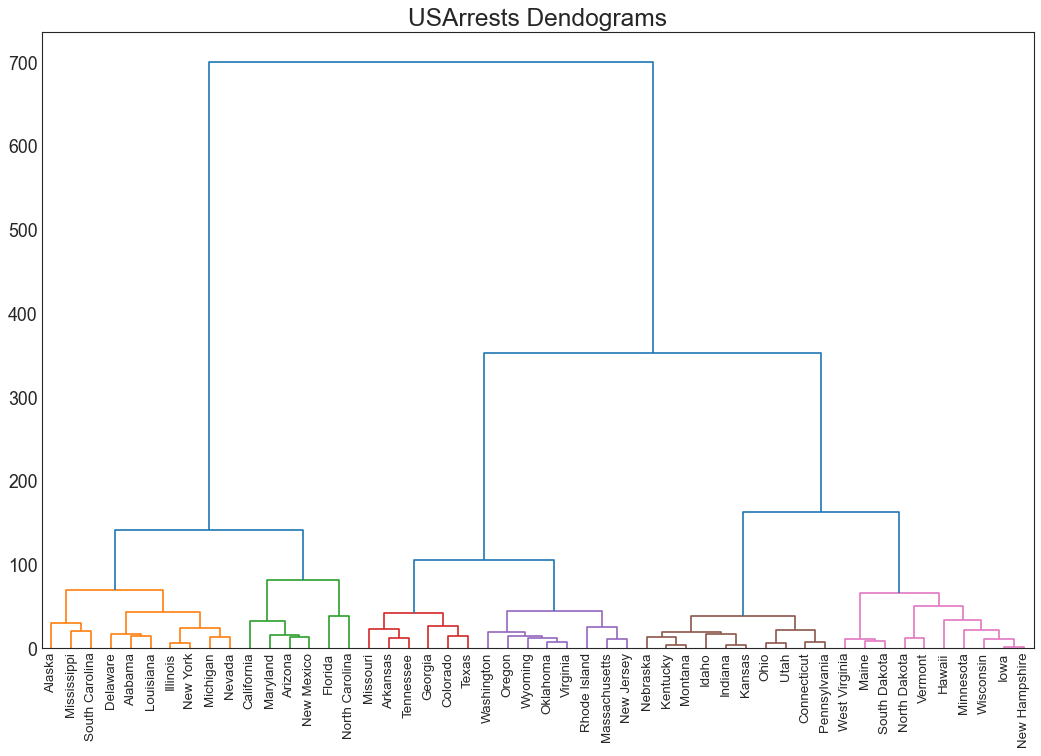

In [145]:
import scipy.cluster.hierarchy as shc

# Import Data
df = pd.read_csv('Data/USArrests.csv')

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

### 簇状图 （Cluster Plot）

簇状图 （Cluster Plot）可用于划分属于同一群集的点。 下面是根据USArrests数据集将美国各州分为5组的代表性示例。 此图使用“谋杀”和“攻击”列作为X和Y轴。 或者，您可以将第一个到主要组件用作X轴和Y轴。

In [146]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('Data/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()


TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

### 安德鲁斯曲线 （Andrews Curve）

安德鲁斯曲线有助于可视化是否存在基于给定分组的数字特征的固有分组。 如果要素（数据集中的列）无法区分组（cyl），那么这些线将不会很好地隔离，如下所示。

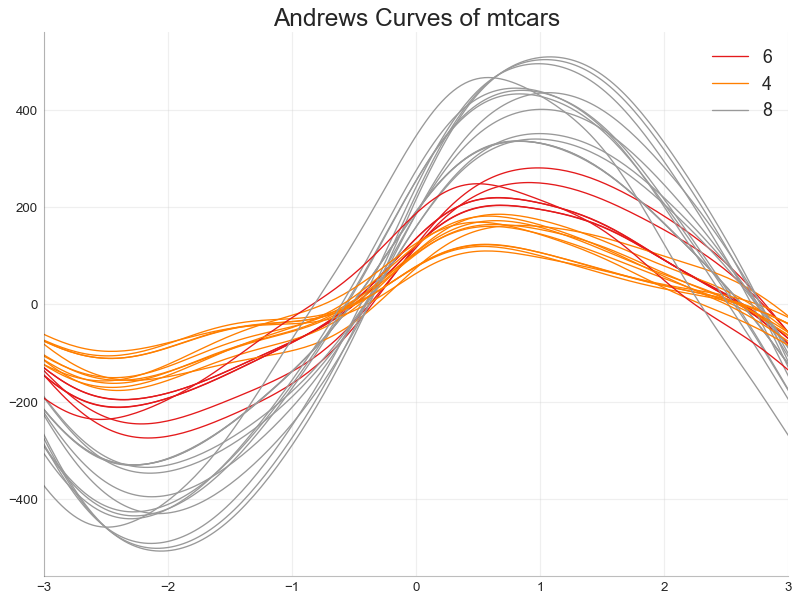

In [56]:
from pandas.plotting import andrews_curves

# Import
df = pd.read_csv("Data/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 平行坐标 （Parallel Coordinates）

平行坐标有助于可视化特征是否有助于有效地隔离组。 如果实现隔离，则该特征可能在预测该组时非常有用。

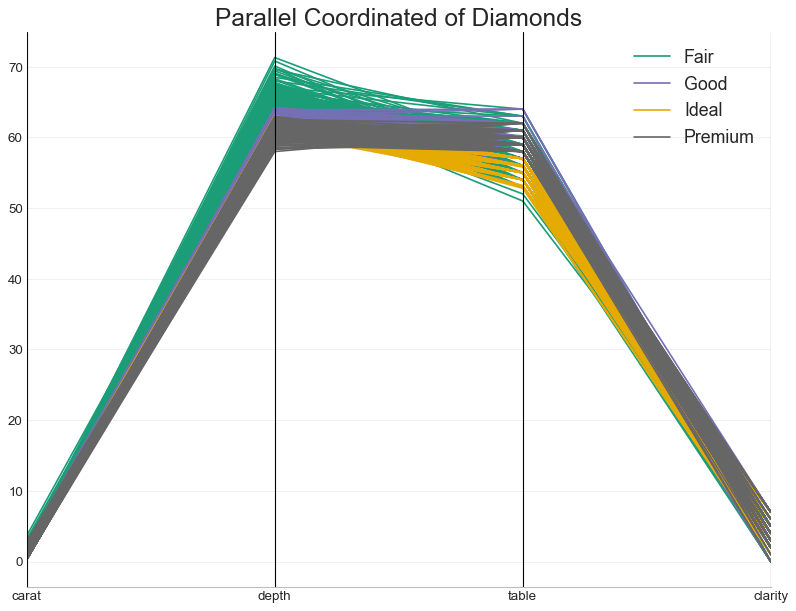

In [147]:
from pandas.plotting import parallel_coordinates

# Import Data
df_final = pd.read_csv("Data/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()